In this task we will be implementing the Naive version of Gaussian Bayes Classifier for continuous attributes.


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [92]:
class GaussianBayes:
    classes=[]
    def __init__(self):
        pass
    def train(self,splitClass):  
        var=[]
        mean=[]
        for x in range(len(self.classes)):      
            var.append(np.var((splitClass[x]),axis=0))         
            mean.append(np.mean(splitClass[x],axis=0))
        return var,mean
        
    def splitClasses(self,X,Y):
        splitClass=[]
        for l in range(len(self.classes)):
            index=(Y==self.classes[l])
            list=X[index]
            splitClass.append(list)
        return splitClass
                
    def priorProb(self,X,Y):
        self.classes=np.unique(Y)
        prior=[]
        classesFrequency=[]
        length=len(self.classes)
        for ind in range(length):
            classesFrequency.append(list(Y).count(self.classes[ind]))
            prior.append(float(classesFrequency[ind])/len(Y))
        return prior
        
    def likelyHood(self,x,varr,meann):
        num1=np.square(x-meann)
        den1=2*varr
        power1=num1/den1
        power2=-power1
        e=math.pow(math.e,power2)
        den2=math.sqrt(2*math.pi*(varr))
        p1=1/den2
        Ans=p1*e
        return Ans
    
    def test(self, X,prior,var,mean):
        nexamples, nfeatures=X.shape
        pclasses=[0]*nexamples
        # your code go here...
        for index in range(nexamples):
            likelyhood=[]
            classesProb=[]
            for count in range(len(self.classes)):
                likehood=1
                for inner in range(nfeatures):
                    likehood=likehood*self.likelyHood(X[index][inner],var[count][inner],mean[count][inner])
                likelyhood.append(likehood)
            for i in range(len(prior)):
                classesProb.append(likelyhood[i]*prior[i])
            maxi=classesProb.index(max(classesProb)) 
            pclasses[index]=self.classes[maxi]
        return np.array(pclasses)
        

In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [4]:
#load the data set
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   


 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


Training Time
========
Let's train a Gaussian Bayes, first train using any only two attributes.
- What Two Attributes to use ? Any Guess, we will be using petal length and width...

In [6]:
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   


 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


In [117]:
# Lets train a Gaussian Naive Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
prior=gb.priorProb(X,Y)
split=gb.splitClasses(Xtrain[:,2:],Ytrain)
var,mean=gb.train(split)

In [118]:
#Lets test it on the set of unseen examples...
pclasses=gb.test(Xtest[:,2:],prior,var,mean)

In [119]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

43
Accuracy =  0.955555555556


 Plotting the Decision Surface of Training Set... 
[0 0 0 ..., 2 2 2] <type 'numpy.int64'> False


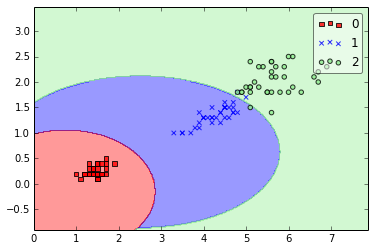

In [31]:
#Lets plot the decision surface
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 
[0 0 0 ..., 2 2 2] <type 'numpy.int64'> False


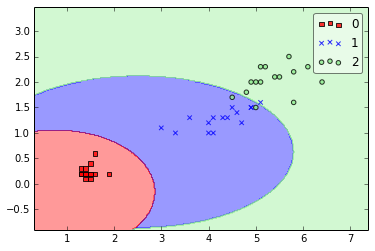

In [32]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,2:],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

In [114]:
# Lets go and use all the four attributes...
fgb=GaussianBayes()
prior=fgb.priorProb(X,Y)
split=fgb.splitClasses(Xtrain,Ytrain)
var,mean=fgb.train(split)

In [115]:
pclasses=fgb.test(Xtest,prior,var,mean)

In [116]:
# Using all four attributes, accuracy is 
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

43
Accuracy =  0.955555555556


#Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

In [113]:
nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[2, 3] # features to use for our system
#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    prior=gb.priorProb(X,Y)
    split=gb.splitClasses(folds[k][0][:,features],folds[k][1])
    var,mean=gb.train(split)
    pclasses=gb.test(folds[k][2][:,features],prior,var,mean)
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)
    totacc.append(acc)

print totacc, '\n Mean Accuracy =', np.mean(totacc)

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 1.0
[Info] Fold 2 Accuracy = 0.916666666667
[Info] Fold 3 Accuracy = 0.944444444444
[Info] Fold 4 Accuracy = 0.972222222222
[1.0, 0.91666666666666663, 0.94444444444444442, 0.97222222222222221] 
 Mean Accuracy = 0.958333333333
